Trying to find a regression based prediction on the pass completion of players.


In [ ]:
import pandas as pd
import requests
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
data_url = 'https://raw.githubusercontent.com/statsbomb/open-data/master/data/'

matches_url = data_url + 'matches/{}/{}.json'
events_url = data_url + 'events/{}.json'

In [ ]:
def pass_parsing(comp_id,season_id):
    matches = requests.get(url=matches_url.format(comp_id,season_id)).json()
    match_id = [x['match_id'] for x in matches]

    pass_data = []
    for id in tqdm(match_id):
        events = requests.get(url= events_url.format(id)).json()
        pass_ = [x for x in events if x['type']['name'] == 'Pass']

        for i in pass_:
            attribute = {
                'Player_ID':i['player']['id'],
                'Player'   :i['player']['name'],
                'Team'   : i['team']['name'],
                'Outcome' : 0 if "outcome" in i['pass'].keys() else 1
            }
            pass_data.append(attribute)

    return pd.DataFrame(pass_data)

In [ ]:
matches = requests.get(url=matches_url.format(2,44)).json()
match_id = [x['match_id'] for x in matches]

pass_data = []
for id in tqdm(match_id):
    events = requests.get(url= events_url.format(id)).json()
    pass_ = [x for x in events if x['type']['name'] == 'Pass']
    print(events)
    break

In [ ]:
comp_id = 2
season_id = 44

df = pass_parsing(comp_id,season_id)

In [ ]:
total_passes = df.groupby('Player')['Outcome'].count()
pass_completion = df.groupby('Player')['Outcome'].mean()

In [ ]:
df_gunner = df.loc[df['Team'] == 'Arsenal']

In [ ]:
ars_pass_comp = df_gunner.groupby('Player')['Outcome'].mean()
ars_passes = df_gunner.groupby('Player')['Outcome'].count()

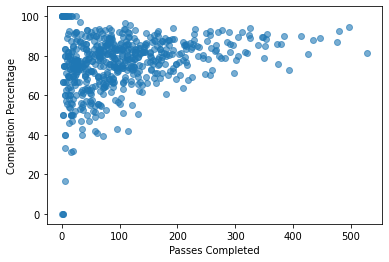

In [ ]:
plt.scatter(total_passes, pass_completion*100, alpha= 0.6)
plt.xlabel('Passes Completed')
plt.ylabel('Completion Percentage')
plt.show()


#Without sklearn library

In [ ]:
import numpy as np

In [ ]:
X = np.array(total_passes).reshape((-1,1))
ones = np.ones((X.shape[0],1))
features = np.concatenate([ones,X],1)
Y = np.array(pass_completion).reshape((-1,1))

Computing Cost Function

Y_hat = theta0 + theta1 * X

Based on the cost function, there should be optimization of the algorithm to reduce the cost


In [ ]:
# FUNCTION FOR COST CALCULATION

def cost_calculation(X,Y,theta):
    square = np.power(((X @ theta.T) - Y),2)
    cost = np.sum(square)
    #print(square_sum.shape)
    return cost / (2 * len(X))

In [ ]:
theta = np.array([[1.0,1.0]])
ans = cost_calculation(features,Y,theta)
print(ans)

30992.171265236655


We try to reduce cost since it is extremely high using GD algorithm

Alpha is learning rate - best determined using elbow or trial and error method

No.of iterations may improve the reduction of cost function for linear regression

In [ ]:
def GD_algo(alpha,iters,X,Y,theta):
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - Y) * X, axis=0)
        #cost = cost_calculation(X,Y,theta)
        #if i % 2 == 0:
            #print(cost)
    return (theta)

In [ ]:
alpha = 0.001
iters = 10000
g = GD_algo(alpha,iters,features,Y,theta)
print(g)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until


[[nan nan]]


In [ ]:
pass_completion.

<bound method Series.isnull of Player
Aaron Hughes             0.734375
Aaron Lennon             0.500000
Adrian Mutu              0.693548
Alain Goma               0.896552
Alan Shearer             0.516129
                           ...   
Yakubu Aiyegbeni         0.705882
Youri Djorkaeff          0.650000
Zat Knight               0.600000
Zoumana Camara           0.800000
Émerson Augusto Thome    0.552632
Name: Outcome, Length: 339, dtype: float64>